# <font color = green>Bike Sharing Assignment<font>

##### <font color = green> By: Himanshu Srivastava <font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = blue>Project Overview:</font>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A `US bike-sharing provider` **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

To overcome all these situation and make some profit after lockdown company have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## <font color = blue>Business Goal or Objective:</font>

`You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.`

### Points to Remember:

1. The model should be built taking **'cnt'** as the target variable.
2. Convert **'weathersit'** and **'season'** column values into categorical string values before proceeding with model building. 3. Think twice before dropping **'yr'** column.
4. Don't forget to calculate R-squared score on the test set.

**<font color="maroon">Input Data:</font>**
- **Bike Sharing Data Set:** Contains the complete daily bike demands across the American market.
- **Bike Sharing Data dictionary:** Data dictionary which describes the meaning of all the variables present in Bike Sharing data set.

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

Steps to follow:

1. Reading and understanding of data.
2. Visualising the data
2. Preparing the data for modelling (train-test split, rescalling, etc..)
3. Building and Training the model
4. Residual analysis of train set
5. Predictions and evaluation on the test set

## Step 1: Reading and Understanding the Data

Let us first import all libraries and read the bike(day) dataset

In [1]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

#Added support for SLR and MLR
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import calendar

In [2]:
# Now load day.csv DataFrames as "bike_df"
bike_df=pd.read_csv("./day.csv")

#### Initial analysis on DataFrames

In [3]:
#Check the shape of dataframes
print("No. of Rows and Columns in Bike DataFrame:", bike_df.shape)

No. of Rows and Columns in Bike DataFrame: (730, 16)


In [4]:
#Check Metadata using info() of DataFrame
print("Metadata of companies DataFrame:\n")
bike_df.info()

Metadata of companies DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Display the data of bike dataframe
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Describe the data of bike dataframe
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Since the difference between mean and median is not much , we can conclude that data has no outliers**

### Data Cleaning

__`1` Inspecting Null Values__<br>
__`2` Dropping unnecessary rows and columns__<br>

In [7]:
#Check null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Data provided is already cleaned and don't have NULL values. So let's check if any column we can drop which is not required for any analysis.**

In [8]:
#Before dropping shape
bike_df.shape

(730, 16)

**From above data we can conclude below:**
- "instant" is an index column so we drop it.
- "dteday" is having similar data as "yr", "mnth", "weekday", etc. so we can drop "dteday" to avoid any confusion.
- It seems that  casual + registered = cnt. Which means that we can consider "cnt" is our target variable and will drop "casual" and "registered".


In [9]:
#Dropping columns
bike_df.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

In [10]:
#After dropping shape
bike_df.shape

(730, 12)

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [14]:
bike_df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [15]:
bike_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

**Based on the data dictionary `season`, `yr`, `mnth` ,`holiday` , `weekday`, `workingday`and `weathersit` all are categorical variables.**

**So for now we will replace `season`, `weekday`, `mnth` and `weathersit` with appropriate values except binary (0 or 1) variables i.e. `yr`, `holiday` and `workingday`.**

In [16]:
#Mapping "season"
bike_df['season'] = bike_df['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})

Let's map different weather situation as below:

- `1: Clear, Few clouds, Partly cloudy, Partly cloudy` ==> **Clear_Clouds**
- `2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist` ==> **Misty_Clouds**
- `3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` ==> **LightRain_Thunderstorm**
- `4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog` ==> **HeavyRain_Thunderstorm_Fog**

In [17]:
#Mapping for "weathersit"
bike_df['weathersit'] = bike_df['weathersit'].map({1:"Clear_Clouds",2:"Misty_Clouds",3:"LightRain_Thunderstorm",4:'HeavyRain_Thunderstorm_Fog'})

In [18]:
#Mapping for "mnth"
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [19]:
#Mapping for "weekday"
bike_df['weekday'] = bike_df['weekday'].map({0:"Sun",1:"Mon",2:"Tues",3:"Wed",4:"Thur",5:"Fri",6:"Sat"})
bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thur,1,Misty_Clouds,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,Misty_Clouds,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,Misty_Clouds,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,Clear_Clouds,10.489153,11.58500,48.3333,23.500518,1796


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable.

We'll visualise our data using `matplotlib` and `seaborn`.

#### <font color=maroon>Visualising Numeric Variables</font>

Let's make a **pairplot** of all the numeric variables

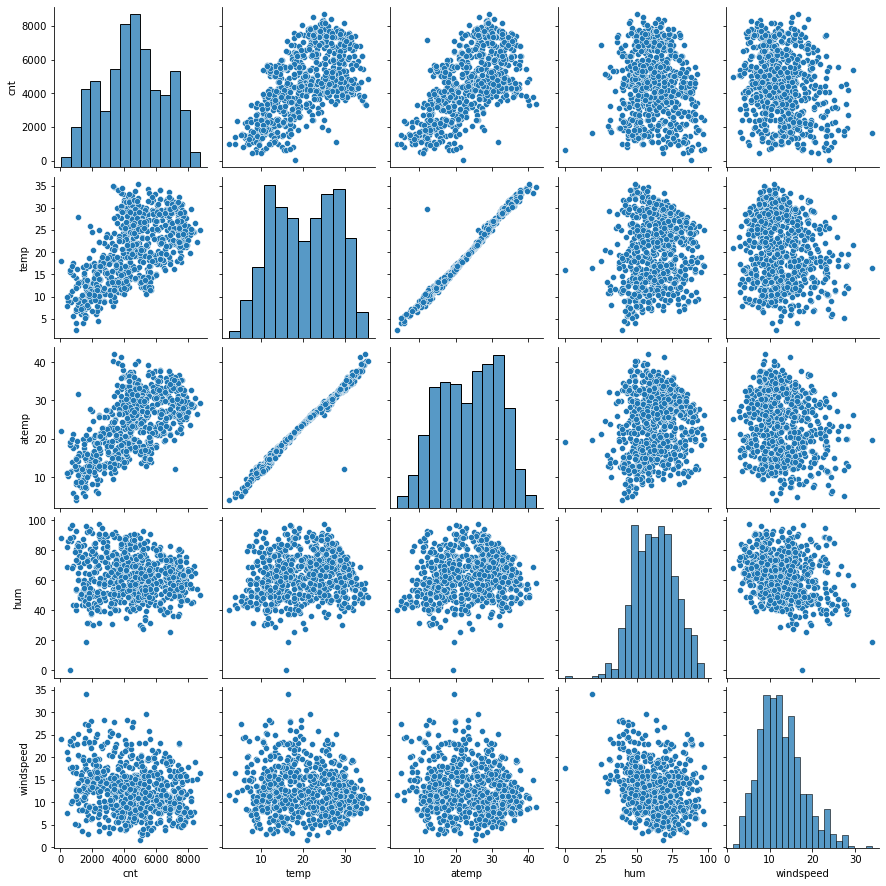

In [21]:
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

`Based on above "temp" and "atemp" is highly correlated with target variable "cnt", so we can drop one column. So let's drop "atemp"`

In [22]:
bike_df.drop(['atemp'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty_Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty_Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Clouds,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

Let's make a boxplot for some of these categorical variables.

In [23]:
#Avoid repetation code so creating function for displaying box plot
def plot_des(df, x_var, y_var, plot_title, x_label, y_label, plot_no, x_rot=0):
    plt.subplot(3,3,plot_no)
    sns.boxplot(x = x_var, y = y_var, data = df)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=x_rot)

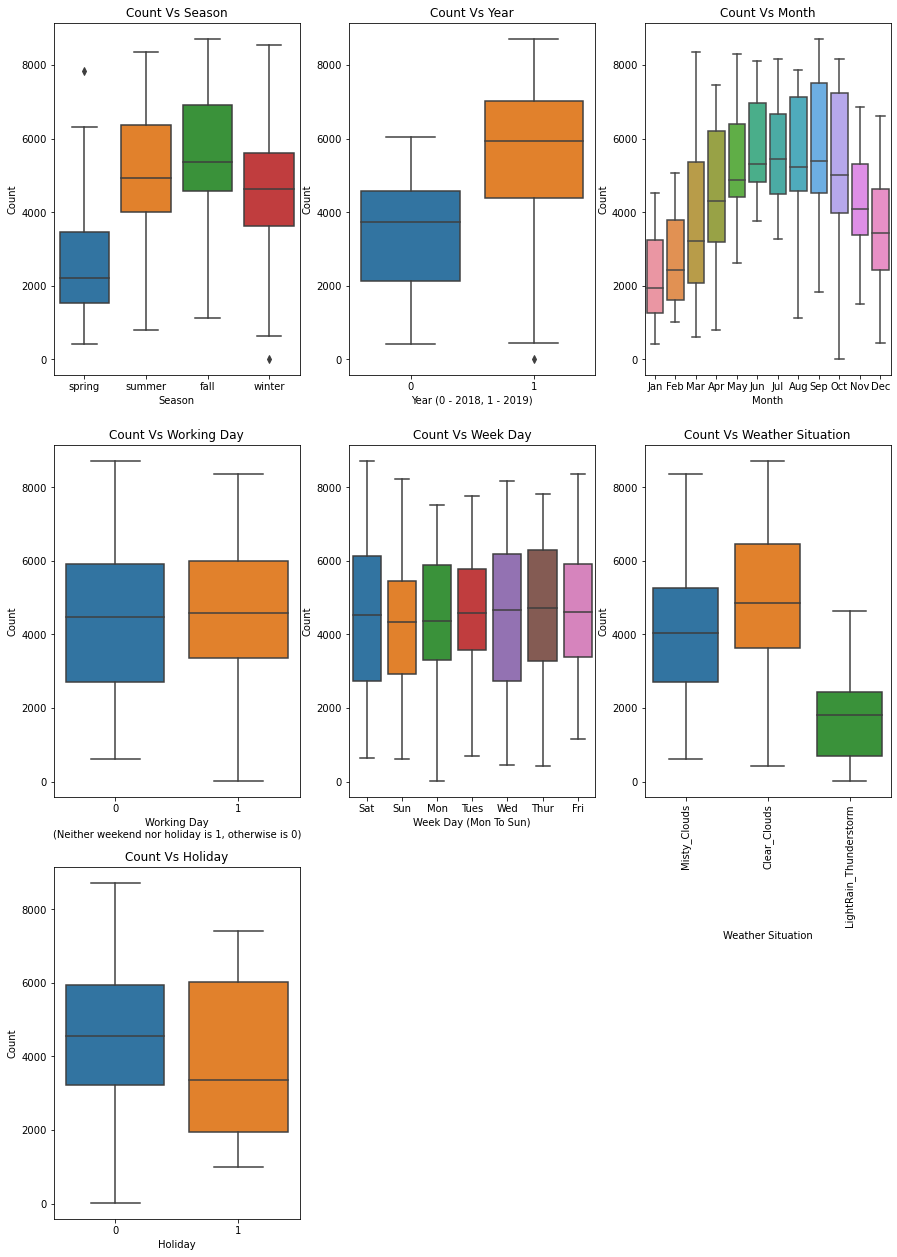

In [24]:
plt.figure(figsize=(15, 22))
#Count Vs Season
plot_des(bike_df, "season", "cnt", "Count Vs Season", "Season", "Count", 1)
#Count Vs Year
plot_des(bike_df, "yr", "cnt", "Count Vs Year", "Year (0 - 2018, 1 - 2019)", "Count", 2)
#Count Vs Month
plot_des(bike_df, "mnth", "cnt", "Count Vs Month", "Month", "Count", 3)
#Count Vs Working Day
plot_des(bike_df, "workingday", "cnt", "Count Vs Working Day", "Working Day\n(Neither weekend nor holiday is 1, otherwise is 0)", "Count", 4)
#Count Vs Week Day
plot_des(bike_df, "weekday", "cnt", "Count Vs Week Day", "Week Day (Mon To Sun)", "Count", 5)
#Count Vs Weather Situation
plot_des(bike_df, "weathersit", "cnt", "Count Vs Weather Situation", "Weather Situation", "Count", 6, 90)
#Count Vs Holiday
plot_des(bike_df, "holiday", "cnt", "Count Vs Holiday", "Holiday", "Count", 7)
plt.show()

**Let's check the correlation coefficients using HeatMap as well.**

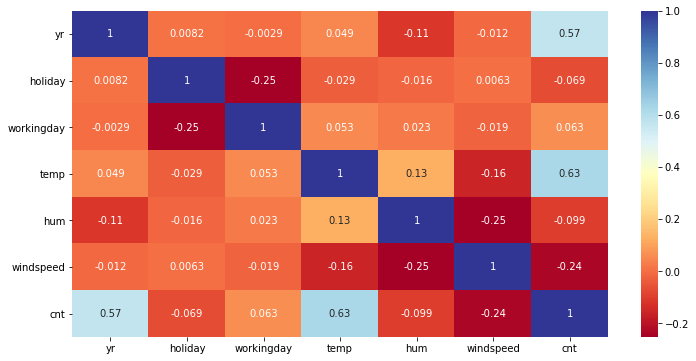

In [25]:
plt.figure(figsize = (12, 6))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdYlBu")
plt.yticks(rotation=0)
plt.show()

Based on all above plots and graph below is the observation:
- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' (weathersit option 4)
- The cnt increase when weather is clear - 'Clear, Few clouds, Partly cloudy, Partly cloudy' (weathersit option 1)
- The cnt values increases in summer months
- The cnt values ars less during holidays


## Step 3: Data Preparation for Modelling

In [26]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty_Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty_Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Clouds,9.305237,43.6957,12.522300,1600


- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s. So let's do it for all columns which is having string values by using `Dummy Variable` concept.
    - Season
    - Weather Condition (weathersit)
    - Day of Week (weekday)
    - Month (mnth)

### Step 3.1: Dummy Variables

**<font color=maroon>1. season</font>**

In [27]:
bike_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

The variable `season` has four levels. We need to convert these levels into integer as well.

In [28]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'bike_season'

bike_season = pd.get_dummies(bike_df[['season']])

In [29]:
# Check what the dataset 'bike_season' looks like
bike_season.value_counts()

season_fall  season_spring  season_summer  season_winter
1            0              0              0                188
0            0              1              0                184
             1              0              0                180
             0              0              1                178
dtype: int64

We don't need four columns. So we can drop the `fall` column, as the type of fall can be identified with just the rest three columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [30]:
# Let's drop the first column from bike_season using 'drop_first = True'

bike_season = pd.get_dummies(bike_df[['season']], drop_first = True)
bike_season.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


**Repeat above similar steps for other below categorical variables.**
   - Weather Condition (weathersit)
   - Day of Week (weekday)
   - Month (mnth)

**<font color=maroon>2. Weather Condition (weathersit)</font>**

In [31]:
bike_df.weathersit.value_counts()

Clear_Clouds              463
Misty_Clouds              246
LightRain_Thunderstorm     21
Name: weathersit, dtype: int64

The variable `weathersit` has three levels. We need to convert these levels into integer as well.

In [32]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'bike_weathersit'

bike_weathersit = pd.get_dummies(bike_df[['weathersit']])

In [33]:
# Check what the dataset 'bike_weathersit' looks like
bike_weathersit.value_counts()

weathersit_Clear_Clouds  weathersit_LightRain_Thunderstorm  weathersit_Misty_Clouds
1                        0                                  0                          463
0                        0                                  1                          246
                         1                                  0                           21
dtype: int64

We don't need three columns. So we can drop the `Clear_Clouds` column, as the type of Clear Clouds can be identified with just the rest three columns where — 
- `00` will correspond to `Clear_Clouds` which is equivalent to `1: Clear, Few clouds, Partly cloudy, Partly cloudy`
- `01` will correspond to `Mist_Clouds` which is equivalent to `2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`
- `10` will correspond to `LightRain_Thunderstorm` which is equivalent to `3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`

In [34]:
# Let's drop the first column from bike_weathersit using 'drop_first = True'

bike_weathersit = pd.get_dummies(bike_df[['weathersit']], drop_first = True)
bike_weathersit.head()

,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


**<font color=maroon>3. Day of Week (weekday)</font>**

In [35]:
bike_df.weekday.value_counts()

Mon     105
Sat     105
Sun     105
Thur    104
Fri     104
Tues    104
Wed     103
Name: weekday, dtype: int64

The variable `weekday` has seven levels. We need to convert these levels into integer as well.

In [36]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'bike_weekday'

bike_weekday = pd.get_dummies(bike_df[['weekday']])

In [37]:
# Check what the dataset 'bike_weekday' looks like
bike_weekday.value_counts()

weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tues  weekday_Wed
0            1            0            0            0             0             0              105
             0            1            0            0             0             0              105
                          0            1            0             0             0              105
1            0            0            0            0             0             0              104
0            0            0            0            1             0             0              104
                                                    0             1             0              104
                                                                  0             1              103
dtype: int64

We don't need seven columns. So we can drop the `Fri` column, as the type of Friday can be identified with just the rest six columns where — 
- `000000` will correspond to `Fri`
- `000001` will correspond to `Wed`
- `000010` will correspond to `Tues`
- `000100` will correspond to `Thur`
- `001000` will correspond to `Sun`
- `010000` will correspond to `Sat`
- `100000` will correspond to `Mon`

In [38]:
# Let's drop the first column from bike_weekday using 'drop_first = True'

bike_weekday = pd.get_dummies(bike_df[['weekday']], drop_first = True)
bike_weekday.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


**<font color=maroon>4. Month (mnth)</font>**

In [39]:
bike_df.mnth.value_counts()

Aug    62
Dec    62
Mar    62
Jan    62
May    62
Oct    62
Jul    62
Nov    60
Apr    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

The variable `mnth` has twelve levels. We need to convert these levels into integer as well.

In [40]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'bike_month'

bike_month = pd.get_dummies(bike_df[['mnth']])

In [41]:
# Check what the dataset 'bike_month' looks like
bike_month.value_counts()

mnth_Apr  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep
0         1         0         0         0         0         0         0         0         0         0         0           62
          0         1         0         0         0         0         0         0         0         0         0           62
                    0         0         1         0         0         0         0         0         0         0           62
                                        0         1         0         0         0         0         0         0           62
                                                  0         0         1         0         0         0         0           62
                                                                      0         1         0         0         0           62
                                                                                0         0         1         0           62
1     

We don't need twelve columns. So we can drop the `Apr` column, as the type of April can be identified with just the rest eleven columns where — 
- `00000000000` will correspond to `Apr`
- `00000000001` will correspond to `Sep`
- `00000000010` will correspond to `Oct`
- `00000000100` will correspond to `Nov`
- `00000001000` will correspond to `May`
- `00000010000` will correspond to `Mar`
- `00000100000` will correspond to `Jun`
- `00001000000` will correspond to `Jul`
- `00010000000` will correspond to `Jan`
- `00100000000` will correspond to `Feb`
- `01000000000` will correspond to `Dec`
- `10000000000` will correspond to `Aug`

In [42]:
# Let's drop the first column from bike_month using 'drop_first = True'

bike_month = pd.get_dummies(bike_df[['mnth']], drop_first = True)
bike_month.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Add the all dummy varibale dataframe i.e "bike_season", "bike_weathersit", "bike_weekday" and "bike_month" to the original "bike_df" dataframe

bike_df = pd.concat([bike_df, bike_season, bike_weathersit, bike_weekday, bike_month], axis = 1)

In [44]:
# Drop 'season', 'weathersit', 'weekday' and 'mnth' as we have created the dummies for it.

bike_df.drop(['season', 'weathersit', 'weekday', 'mnth'], axis = 1, inplace = True)

In [45]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Now all data preparation for model is completed. Let's check it's shape and some initial data.

In [46]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   yr                                 730 non-null    int64  
 1   holiday                            730 non-null    int64  
 2   workingday                         730 non-null    int64  
 3   temp                               730 non-null    float64
 4   hum                                730 non-null    float64
 5   windspeed                          730 non-null    float64
 6   cnt                                730 non-null    int64  
 7   season_spring                      730 non-null    uint8  
 8   season_summer                      730 non-null    uint8  
 9   season_winter                      730 non-null    uint8  
 10  weathersit_LightRain_Thunderstorm  730 non-null    uint8  
 11  weathersit_Misty_Clouds            730 non-null    uint8  

In [47]:
bike_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
bike_df.shape

(730, 29)

### Step 3.2: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [49]:
# We specify this so that the train and test data set always have the same rows, respectively. Split it in 70-30 proportion.
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [50]:
#Let's check train set which should be 80% of main dataset i.e. around 70% of 730 = 510
bike_df_train.shape

(510, 29)

In [51]:
bike_df.shape

(730, 29)

In [52]:
#Let's check test set which should be 20% of main dataset i.e. around 30% of 730 = 220
bike_df_test.shape

(220, 29)

### Step 3.3: Rescaling the Features 

Scaling doesn't impact our model. So here we can see that except for `temp`, `hum`, `windspeed` and `cnt`, all the columns have small integer or binary values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might create problem at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation)
2. Standardisation (mean-0, sigma-1) 

So in our case we will be using Min-Max scaling.

Min-Max Scaling (normalisation)

normalisation: $\frac{x - x_{max}}{x_{max} -x_{min}}$

In [53]:
scaler = MinMaxScaler()

#### fit() : This used to learn $(x_{min}, x_{max})$
#### transform() : This used to compute $\frac{x - x_{min}}{x_{max} - x_{min}}$
#### fit_transform() : This do both above together learn $(x_{min}, x_{max})$ and compute ($\frac{x - x_{min}}{x_{max} - x_{min}}$)

In [54]:
# Apply scaler() to all the columns except the '0 or 1' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [55]:
bike_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
bike_df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`After Min-Max Scaling all columns values lies between same unit i.e Mininum value as "0" and Maximum value as "1"`

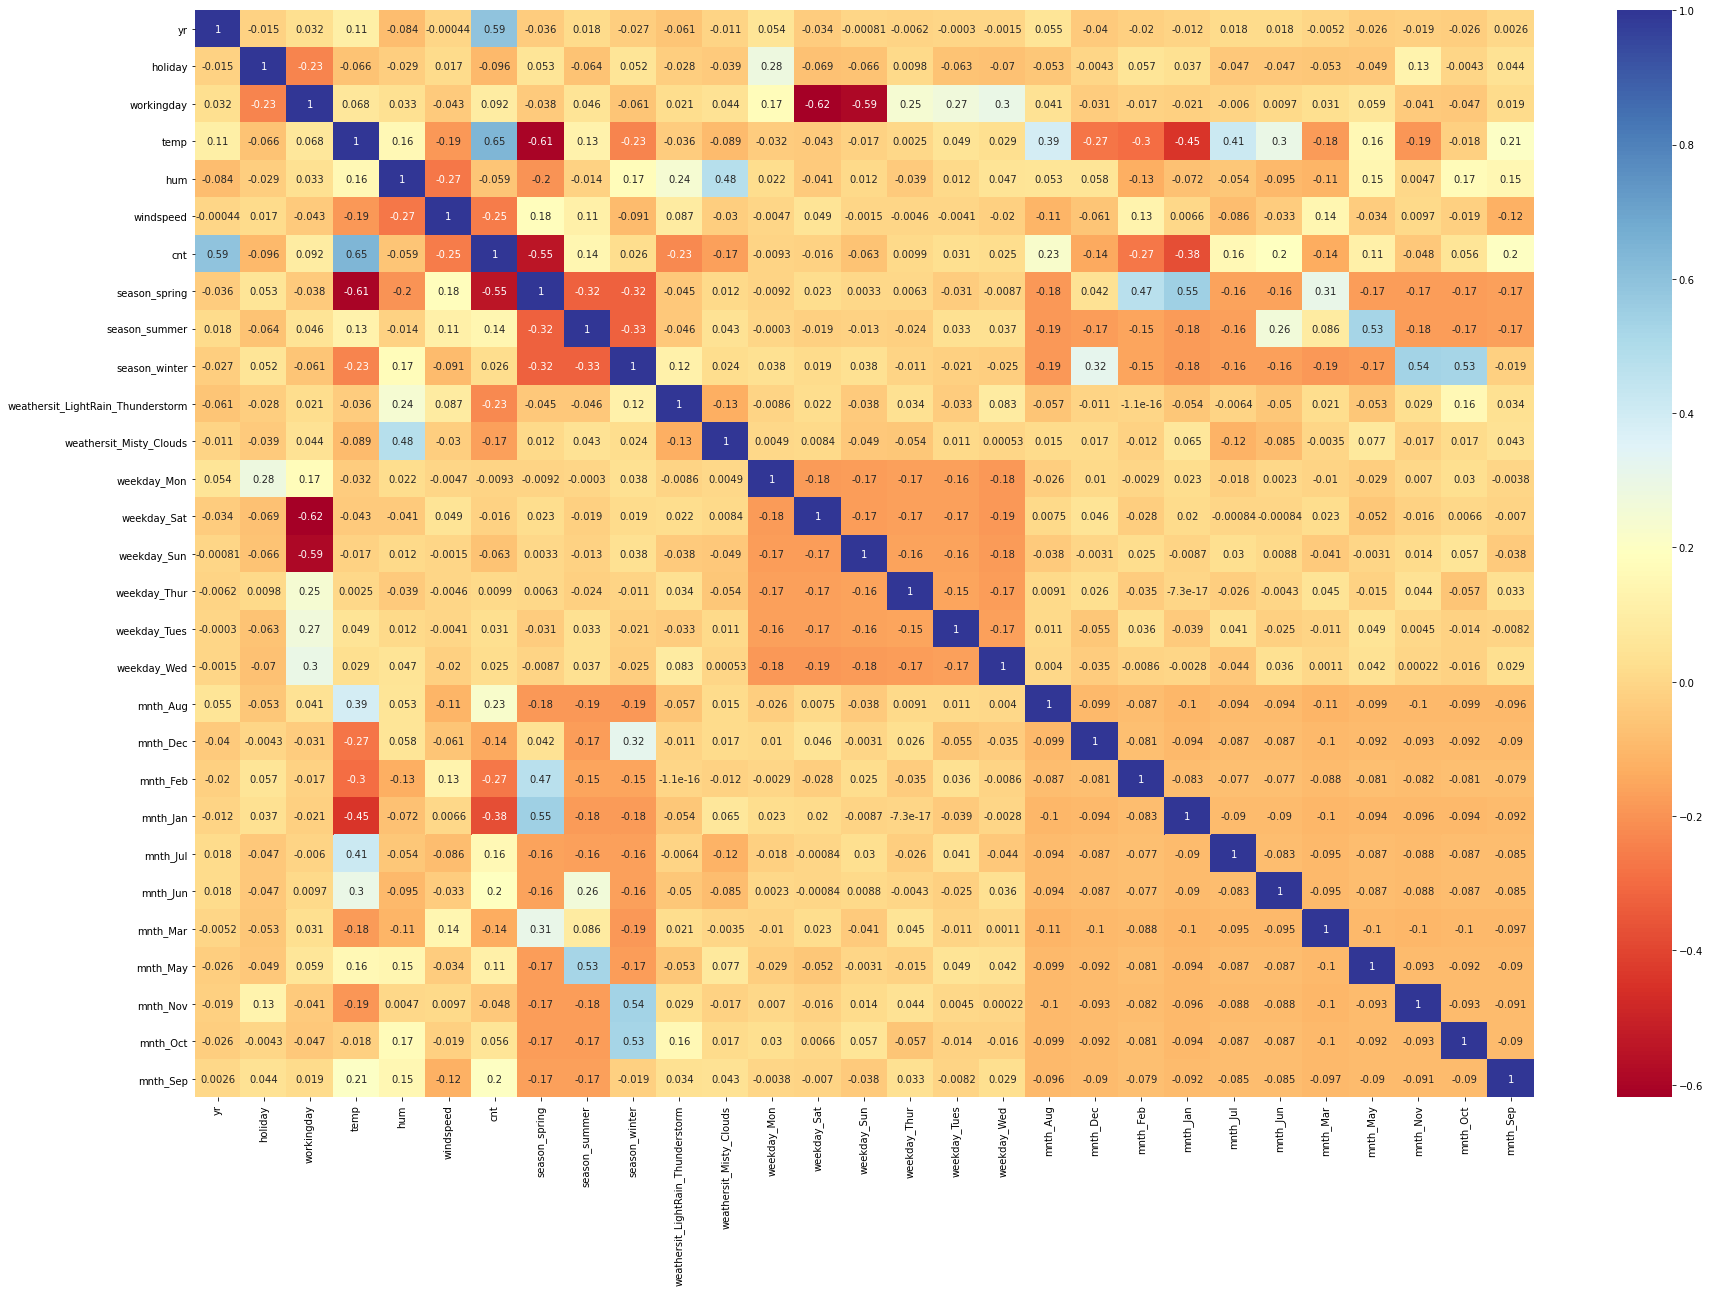

In [57]:
# Let's check the correlation coefficients to see which variables are highly correlated after scalling and dummy variable.

plt.figure(figsize = (30, 20))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="RdYlBu")
plt.show()

As we know that our target variable is `cnt` so will consider all columns as `X_train` data set except "cnt" column. Around `15` columns have positive correlation with `cnt`.

### Step 3.4: Dividing into X and Y sets for the model building

In [58]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

In [59]:
X_train.shape

(510, 28)

In [60]:
y_train.shape

(510,)

In [61]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

    While building a model, we need to check below on all variables one by one
	 a. Statistical significance of variable
	 b. VIF

## Step 4: Building a linear model

We are going for an **automated process** of selecting a variable and predicting model. So for that to fit a regression line through the training data we are going to use `LinearRegression function from SciKit Learn` as it is compatibile with `Recursive Feature Elimination (RFE)`.

Also to avoid adding columns one by one which may end up as tedious so we will using RFE approach.

**Recursive Feature Elimination (RFE)**

In [63]:
#Creating an object of linear Regression
bike_lm = LinearRegression()

In [64]:
#Fitting a model
bike_lm.fit(X_train,y_train)

#Based on above heatmap around 15 columns have positive correlation with cnt. 
#So we will be eliminating columns using RFE in a set of 15 features. 

bike_rfe = RFE(bike_lm, 15)

bike_rfe = bike_rfe.fit(X_train,y_train)

In [65]:
#Display columns selected by RFE and their weights.
list(zip(X_train.columns, bike_rfe.support_,bike_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_LightRain_Thunderstorm', True, 1),
 ('weathersit_Misty_Clouds', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 13),
 ('weekday_Tues', False, 7),
 ('weekday_Wed', False, 12),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 14),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1)]

### Building model using statsmodel for the detailed statistics

### <font color=green>Building Model 1</font>

In [66]:
def disp_ols(lr):
    # Check the parameters obtained
    print("\n---------------------------------------------------------")
    print("Display the coefficient of all parameters")
    print(lr.params)
    print("---------------------------------------------------------\n")
    
    # Print a summary of the linear regression model obtained
    print("Display the OLS Regression Summary of all parameters")
    print(lr.summary())
    print("---------------------------------------------------------\n")

In [67]:
def vif_validation(vif_df):
    vif = pd.DataFrame()
    vif_df = vif_df.drop(['const'], axis=1)
    vif['features'] = vif_df.columns
    vif['vif'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['vif'] = round(vif['vif'], 2)
    vif = vif.sort_values(by='vif', ascending=False)
    return vif

In [68]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm1 = X_train.columns[bike_rfe.support_]
rfe_col_sel_lm1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sat', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [69]:
#Display columsn which is not selected by RFE.
rfe_col_notsel_lm1 = X_train.columns[~bike_rfe.support_]
rfe_col_notsel_lm1

Index(['weekday_Mon', 'weekday_Thur', 'weekday_Tues', 'weekday_Wed',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct'],
      dtype='object')

`So now we have a list of variable on which we need to build a model. Let's create new dataframe and use that for creating model and test.`

In [70]:
X_train_lm = X_train[rfe_col_sel_lm1]

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.199526
yr                                   0.229763
holiday                             -0.018447
workingday                           0.083669
temp                                 0.527708
hum                                 -0.161086
windspeed                           -0.180875
season_spring                       -0.055546
season_summer                        0.053733
season_winter                        0.099214
weathersit_LightRain_Thunderstorm   -0.245009
weathersit_Misty_Clouds             -0.056344
weekday_Sat                          0.093668
weekday_Sun                          0.040636
mnth_Jul                            -0.054616
mnth_Sep                             0.081983
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regr

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,1,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,1,0,0,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0


### Checking VIF for multi-collinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [71]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sat', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [72]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
2,workingday,50.68
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
10,weathersit_Misty_Clouds,1.57


We generally want a VIF that is less than 5 and p-value should be significant. So there are clearly some variables we need to drop.

We will follow below sequence approach for eliminating columns:
1. High-Low
    - High p-value, Low VIF   ==> Remove these first because it have low significance
    - Low p-value, High VIF   ==> Remove these after above
2. High p-value, high VIF ==> Remove it easily.
3. Low p-value, Low VIF

### <font color=green>Building Model 2</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has high p-value of `0.386`. Let's go ahead and drop this variables

In [73]:
rfe_col_sel_lm1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sat', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [74]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm2 = rfe_col_sel_lm1.drop(['holiday'])
rfe_col_sel_lm2

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [75]:
X_train_lm = X_train_lm[rfe_col_sel_lm2]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)
#Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.181079
yr                                   0.229763
workingday                           0.102116
temp                                 0.527708
hum                                 -0.161086
windspeed                           -0.180875
season_spring                       -0.055546
season_summer                        0.053733
season_winter                        0.099214
weathersit_LightRain_Thunderstorm   -0.245009
weathersit_Misty_Clouds             -0.056344
weekday_Sat                          0.112115
weekday_Sun                          0.059083
mnth_Jul                            -0.054616
mnth_Sep                             0.081983
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,1,0,0,0
111,1.0,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0


In [76]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Sat,4.91
5,season_spring,4.80
11,weekday_Sun,4.76
7,season_winter,3.69
6,season_summer,3.04
9,weathersit_Misty_Clouds,2.31


**Now we can see, the p-values are within an acceptable range and significant but we generally want a VIF that is less than 5. So there are clearly some variables we need to drop.**

### <font color=green>Building Model 3</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has high VIF of `32.10`. Let's go ahead and drop this variables

In [77]:
rfe_col_sel_lm2

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [78]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm3 = rfe_col_sel_lm2.drop(['hum'])
rfe_col_sel_lm3

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [79]:
X_train_lm = X_train_lm[rfe_col_sel_lm3]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.100820
yr                                   0.233727
workingday                           0.102859
temp                                 0.491531
windspeed                           -0.149066
season_spring                       -0.065505
season_summer                        0.047677
season_winter                        0.084588
weathersit_LightRain_Thunderstorm   -0.289513
weathersit_Misty_Clouds             -0.082161
weekday_Sat                          0.114616
weekday_Sun                          0.056739
mnth_Jul                            -0.049633
mnth_Sep                             0.075934
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared

,const,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,1,1,0,0,0
111,1.0,0,1,0.345824,0.380981,0,1,0,0,1,0,0,0,0


In [80]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_Sat,4.45
10,weekday_Sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
11,mnth_Jul,1.60


### <font color=green>Building Model 4</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has high VIF of `16.19`. Let's go ahead and drop this variables

In [81]:
rfe_col_sel_lm3

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [82]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm4 = rfe_col_sel_lm3.drop(['workingday'])
rfe_col_sel_lm4

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [83]:
X_train_lm = X_train_lm[rfe_col_sel_lm4]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.200319
yr                                   0.234206
temp                                 0.492841
windspeed                           -0.151258
season_spring                       -0.068096
season_summer                        0.048063
season_winter                        0.081626
weathersit_LightRain_Thunderstorm   -0.284826
weathersit_Misty_Clouds             -0.080246
weekday_Sat                          0.015707
weekday_Sun                         -0.042087
mnth_Jul                            -0.048813
mnth_Sep                             0.072326
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:          

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0,0,1,1,0,0,0
728,1.0,1,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,1,1,0,0,0
111,1.0,0,0.345824,0.380981,0,1,0,0,1,0,0,0,0


In [84]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
10,mnth_Jul,1.59
7,weathersit_Misty_Clouds,1.55
11,mnth_Sep,1.33
8,weekday_Sat,1.22


### <font color=green>Building Model 5</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_Sat` as it has high p-value of `0.171`. Let's go ahead and drop this variables

In [85]:
rfe_col_sel_lm4

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')

In [86]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm5 = rfe_col_sel_lm4.drop(['weekday_Sat'])
rfe_col_sel_lm5

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [87]:
X_train_lm = X_train_lm[rfe_col_sel_lm5]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.203387
yr                                   0.233876
temp                                 0.491742
windspeed                           -0.149694
season_spring                       -0.068197
season_summer                        0.047885
season_winter                        0.081830
weathersit_LightRain_Thunderstorm   -0.284654
weathersit_Misty_Clouds             -0.080237
weekday_Sun                         -0.044959
mnth_Jul                            -0.048253
mnth_Sep                             0.072321
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:       

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0,0,1,0,0,0
728,1.0,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,1,0,0,0
111,1.0,0,0.345824,0.380981,0,1,0,0,1,0,0,0


In [88]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
9,mnth_Jul,1.59
7,weathersit_Misty_Clouds,1.55
10,mnth_Sep,1.33
8,weekday_Sun,1.17


### <font color=green>Building Model 6</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp` as it has high VIF of `5.14`. Let's go ahead and drop this variables

In [89]:
rfe_col_sel_lm5

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightRain_Thunderstorm',
       'weathersit_Misty_Clouds', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [90]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm6 = rfe_col_sel_lm5.drop(['temp'])
rfe_col_sel_lm6

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [91]:
X_train_lm = X_train_lm[rfe_col_sel_lm6]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.588252
yr                                   0.247527
windspeed                           -0.172401
season_spring                       -0.301957
season_summer                       -0.043650
season_winter                       -0.079580
weathersit_LightRain_Thunderstorm   -0.296260
weathersit_Misty_Clouds             -0.089501
weekday_Sun                         -0.045245
mnth_Jul                            -0.008764
mnth_Sep                             0.068070
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least

,const,yr,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sun,mnth_Jul,mnth_Sep
576,1.0,1,0.264686,0,0,0,0,0,0,1,0
426,1.0,1,0.255342,1,0,0,0,1,0,0,0
728,1.0,1,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.188475,0,1,0,0,1,0,0,0
111,1.0,0,0.380981,0,1,0,0,1,0,0,0


In [92]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
1,windspeed,3.82
2,season_spring,2.08
3,season_summer,2.03
0,yr,1.84
4,season_winter,1.75
6,weathersit_Misty_Clouds,1.51
8,mnth_Jul,1.21
7,weekday_Sun,1.16
9,mnth_Sep,1.15
5,weathersit_LightRain_Thunderstorm,1.08


### <font color=green>Building Model 7 (FINAL)</font>

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_Jul` as it has high VIF of `0.692`. Let's go ahead and drop this variables

In [93]:
rfe_col_sel_lm6

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sun', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [94]:
#As RFE provide all the columns which need to treat and play role in analysis. We will start with these columns for manual elimination
rfe_col_sel_lm7 = rfe_col_sel_lm6.drop(['mnth_Jul'])
rfe_col_sel_lm7

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sun', 'mnth_Sep'],
      dtype='object')

In [95]:
X_train_lm = X_train_lm[rfe_col_sel_lm7]
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
bike_lm = sm.OLS(y_train,X_train_lm).fit()
    
disp_ols(bike_lm)
X_train_lm.head()


---------------------------------------------------------
Display the coefficient of all parameters
const                                0.585029
yr                                   0.247559
windspeed                           -0.172324
season_spring                       -0.298844
season_summer                       -0.040547
season_winter                       -0.076629
weathersit_LightRain_Thunderstorm   -0.296379
weathersit_Misty_Clouds             -0.089225
weekday_Sun                         -0.045455
mnth_Sep                             0.070521
dtype: float64
---------------------------------------------------------

Display the OLS Regression Summary of all parameters
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     17

,const,yr,windspeed,season_spring,season_summer,season_winter,weathersit_LightRain_Thunderstorm,weathersit_Misty_Clouds,weekday_Sun,mnth_Sep
576,1.0,1,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.255342,1,0,0,0,1,0,0
728,1.0,1,0.663106,1,0,0,0,0,1,0
482,1.0,1,0.188475,0,1,0,0,1,0,0
111,1.0,0,0.380981,0,1,0,0,1,0,0


In [96]:
#Calculate VIF for new model
vif_validation(X_train_lm)

,features,vif
1,windspeed,3.49
2,season_spring,1.91
3,season_summer,1.87
0,yr,1.78
4,season_winter,1.64
6,weathersit_Misty_Clouds,1.51
7,weekday_Sun,1.15
8,mnth_Sep,1.13
5,weathersit_LightRain_Thunderstorm,1.08


**<font color=green>Now we can see, the `VIFs` and `p-values` both are within an acceptable range. So we can go ahead and make our predictions using this model only.</font>**

## Step 5: Residual analysis of the Train Data Set
To validate assumptions of the model, and hence the reliability for inference. We are are considering **Model 3** as final predictive model.

#### Step 5.1 Normal Distribution of the error terms
We need to check if the error terms are also normally distributed i.e. around 0 or not (which is infact, one of the major assumptions of linear regression), let us plot the distplot of the error terms and see what it looks like.

Text(0.5, 0, 'Error Terms (Residuals)')

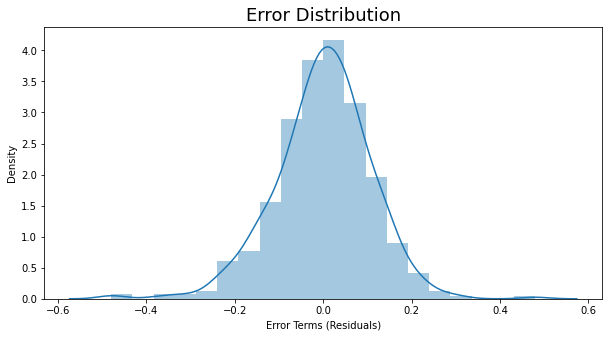

In [97]:
plt.figure(figsize=(10,5))
y_train_pred = bike_lm.predict(X_train_lm)
residual = y_train - y_train_pred
sns.distplot(residual, bins=20)
plt.title("Error Distribution", fontdict={'fontsize': 18})
plt.xlabel("Error Terms (Residuals)")

#### Step 5.2 Error terms are independent

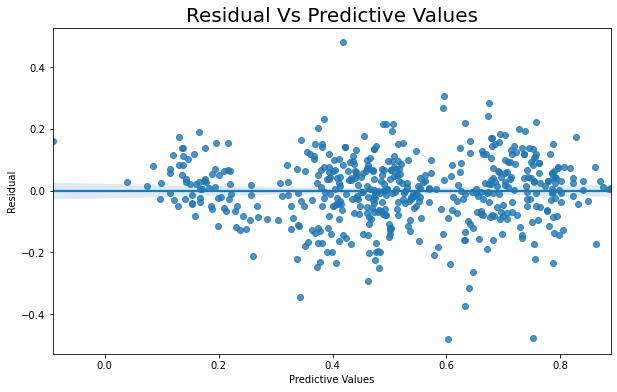

In [98]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_train_pred,y=residual)
plt.title("Residual Vs Predictive Values", fontdict={'fontsize':20})
plt.xlabel("Predictive Values")
plt.ylabel("Residual")
plt.show()

`From above graph we can see that there is no relation and specific pattern between residual and predicted values which is good sign for model`

## Step 6: Prediction and Evaluation of Final Model on Test Set

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. **$7^{th}$ model**.

#### Step 6.1 Making Prediction on Test Set

`Let's check data in test set`

In [99]:
bike_df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


**Applying the scaling on the test sets**

In [100]:
test_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_df_test[test_vars] = scaler.fit_transform(bike_df_test[test_vars])
bike_df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [101]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

**Now let's use our model to make predictions.**

In [102]:
X_test_new = X_train_lm.drop(['const'],axis=1)
X_test_new.columns

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Sun', 'mnth_Sep'],
      dtype='object')

In [103]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightRain_Thunderstorm', 'weathersit_Misty_Clouds',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tues', 'weekday_Wed', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [104]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_test_new.columns]

#Adding constant variable
X_test_lm = sm.add_constant(X_test_new)

#Prediction using Seventh Model
y_test_pred = bike_lm.predict(X_test_lm)

In [105]:
y_test_pred

184    0.470060
535    0.752210
299    0.342767
221    0.507534
152    0.426890
         ...   
702    0.689848
127    0.476264
640    0.647496
72     0.236283
653    0.686322
Length: 220, dtype: float64

#### Step 6.2: Model Evaluation

Let's now plot the graph for actual versus predicted values.

**Checking the RMSE on the test set**

In [106]:
print(mean_squared_error(y_test, y_test_pred))

0.01535329500691387


**Checking the R-squared on the test set**

In [107]:
print("R-Squared on Train Set:",r2_score(y_train, y_train_pred))
print("R-Squared on Test Set:",r2_score(y_test, y_test_pred))

R-Squared on Train Set: 0.7630933562517631
R-Squared on Test Set: 0.7311093401956448


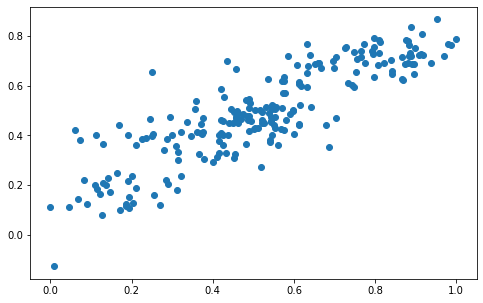

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_test_pred)
plt.show()

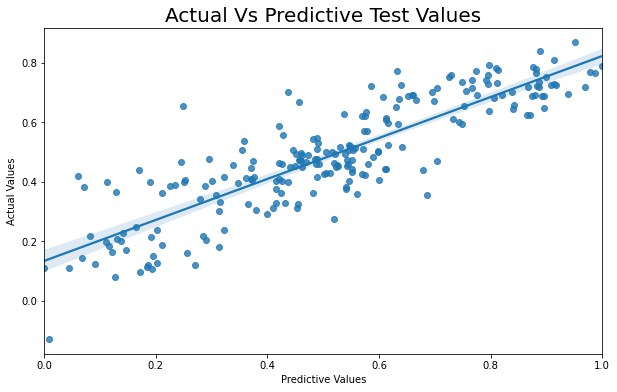

In [109]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test,y=y_test_pred)
plt.title("Actual Vs Predictive Test Values", fontdict={'fontsize':20})
plt.xlabel("Predictive Values")
plt.ylabel("Actual Values")
plt.show()

**Plot Shows Linear Relationship between Actual and Predicted Test Values.**

In [110]:
bike_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.77e-150
Time:                        21:19:25   Log-Likelihood:                 406.12
No. Observations:                 510   AIC:                            -792.2
Df Residuals:                     500   BIC:                            -749.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.5850      0.015     39.507      0.000       0.556       0.614
yr                                    0.2476      0.010     25.269      0.000       0.228       0.267
windspeed                            -0.1723      0.030     -5.742      0.000      -0.231      -0.113
season_spring                        -0.2988      0.015    -20.085      0.000      -0.328      -0.270
season_summer                        -0.0405      0.015     -2.756      0.006      -0.069      -0.012
season_winter                        -0.0766      0.014     -5.395      0.000      -0.105      -0.049
weathersit_LightRain_Thunderstorm    -0.2964      0.030    -10.013      0.000      -0.355      -0.238
weathersit_Misty_Clouds              -0.0892      0.010     -8.546      0.000      -0.110      -0.069
weekday_Sun                          -0.0455      0.014     -3.249      0.001      -0.073      -0.018
mnth_Sep                              0.0705      0.019      3.641      0.000       0.032       0.109
==============================================================================
Omnibus:                       36.989   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.983
Skew:                          -0.379   Prob(JB):                     1.29e-19
Kurtosis:                       4.876   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

$cnt = 0.5850 + (0.2476 \times yr) - (0.1723 \times windspeed) - (0.2988 \times season\_spring) - (0.0405 \times season\_summer) - (0.0766 \times season\_winter) - (0.2964 \times weathersit\_LightRain\_Thunderstorm) - (0.0892 \times weathersit\_Misty\_Clouds) - (0.0455 \times mnth\_Sun) + (0.0705 \times mnth\_Sep)$

Overall we have a decent model. 

`All the positive coefficients like mnth_Sep and yr indicate that an increase in these values will lead to an increase in the value of cnt.`

`All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.`

- yr is the most significant with the largest coefficient.
- Bike rentals is more for the month of september
- Demand of bike is less in Spring season and during weather condition (weathersit_LightRain_Thunderstorm)
- The rentals reduce during holidays

Note: weathersit_LightRain_Thunderstorm => Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

This indicates that the bike rentals is majorly affected by season, weather condition and year.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color=green>End of Bike Sharing Assignment</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**